In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breeds/dog-breeds/husky/husky56.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky40.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky18.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky58.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky62.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky20.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky75.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky10.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky34.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky28.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky30.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky100.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky71.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky72.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky42.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky74.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky101.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky92.jpg
/kaggle/input/dog-breeds/d

### importing libraries

To begin with, we need to import several libraries to enable us to perform various tasks related to data visualization, image processing, and machine learning.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image


### loading the dataset

In [3]:
root="/kaggle/input/dog-breeds/dog-breeds"

In [4]:
dogs=os.listdir(root)
dogs

['husky',
 'beagle',
 'rottweiler',
 'german-shepherd',
 'dalmatian',
 'poodle',
 'bulldog',
 'labrador-retriever']

### Creation of dataframe


In [5]:
images=[]
dog_breed=[]
for dog in dogs:
    directory=root +  "/" + dog + "/"
    for image in os.listdir(directory):
        images.append(directory + image)
        dog_breed.append(dog)   

In [6]:
Images = pd.Series(images, name="Image").astype(str)

In [7]:
Images.head()

0    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
1    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
2    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
3    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
4    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
Name: Image, dtype: object

In [8]:
dog_breed=pd.Series(dog_breed, name="BREED")
data=pd.concat([Images, dog_breed], axis=1)
data.head()

,Image,BREED
0,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
1,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
2,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
3,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
4,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky


In [9]:
data=data.sample(frac=1).reset_index(drop = True)

In [10]:
data


,Image,BREED
0,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
1,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
2,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
3,/kaggle/input/dog-breeds/dog-breeds/labrador-r...,labrador-retriever
4,/kaggle/input/dog-breeds/dog-breeds/poodle/poo...,poodle
...,...,...
536,/kaggle/input/dog-breeds/dog-breeds/poodle/poo...,poodle
537,/kaggle/input/dog-breeds/dog-breeds/labrador-r...,labrador-retriever
538,/kaggle/input/dog-breeds/dog-breeds/beagle/bea...,beagle
539,/kaggle/input/dog-breeds/dog-breeds/german-she...,german-shepherd


In [11]:
data.shape

(541, 2)

### Image visualization


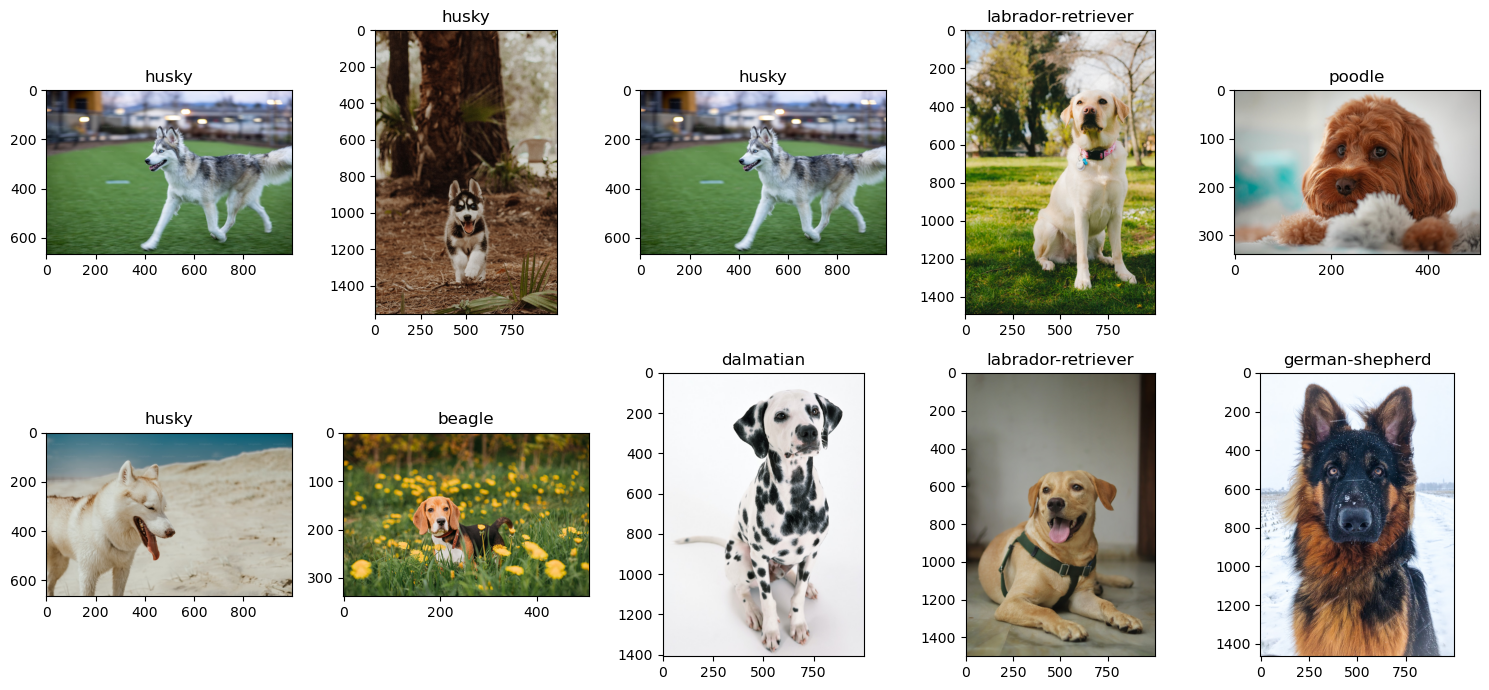

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))

for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(data.loc[i, "Image"]))
    ax.set_title(data.loc[i, "BREED"])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
dev, test =train_test_split(data, train_size=0.9, shuffle=True, random_state=42)

### ImageDataGenerator 

In [17]:
import keras
from keras.preprocessing.image import ImageDataGenerator

### flow from dataframe

In [18]:
dev_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    fill_mode="nearest",
    validation_split=0.2
)

In [19]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

### train

In [20]:
train_images = dev_generator.flow_from_dataframe(
    dataframe=dev,
    x_col='Image',
    y_col='BREED',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 389 validated image filenames belonging to 8 classes.


### validate

In [21]:
val_images = dev_generator.flow_from_dataframe(
    dataframe=dev,
    x_col='Image',
    y_col='BREED',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 97 validated image filenames belonging to 8 classes.


### test 

In [22]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test,
    x_col='Image',
    y_col='BREED',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode=None,
    batch_size=32,
    shuffle=False
)

Found 55 validated image filenames.


In [24]:
!pip install tensorflow
!pip install keras


### MobileNet Transfer Learning for Image Classification


**This code demonstrates how to use transfer learning with the MobileNet model to perform image classification. Transfer learning allows us to leverage pre-trained models that have been trained on large-scale datasets, such as ImageNet, and apply them to our specific task with limited training data.**

### Code Explanation

    1. Importing Dependencies: We begin by importing the necessary dependencies, including the MobileNet model from Keras, as well as other required layers and callbacks

In [33]:
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D

     2. Defining Input Shape and Base Model:
    We define the desired input image size (64x64x3) and initialize the MobileNet model as the base model. The include_top=False argument ensures that the top classification layer of the MobileNet model is excluded.​

In [34]:
# Reduce input image size
input_shape = (64, 64, 3)


    3. Freezing Base Model Layers:
     We freeze the base model layers to prevent their weights from being updated during training. This is beneficial when dealing with limited training data to avoid overfitting and leverage the pre-trained weights.​

In [35]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base model layers
base_model.trainable = False

17225924/17225924 [==============================] - 0s 0us/step


    4. Building the Model Architecture:
    We create a Sequential model and add the base MobileNet model as the first layer. We then add a GlobalAveragePooling2D layer to reduce the spatial dimensions, followed by Dropout and Dense layers to perform classification. The final Dense layer uses the softmax activation function for multi-class classification.

In [39]:
model=Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
num_classes = 8
model.add(Dense(num_classes, activation='softmax'))

    5. Compiling the Model:
    We compile the model by specifying the loss function, optimizer, and evaluation metrics. In this case, we use categorical cross-entropy as the loss function, the Adam optimizer, and track accuracy and mean squared error as evaluation metrics.

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 2, 2, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

    6. Training the Model: 
    We fit the model to the training data (train_images) and validate it on the validation data (val_images) using the provided training parameters. The batch size is set to 32,for improved training efficiency.

In [41]:
# Use a smaller batch size
batch_size = 32
history = model.fit(train_images, validation_data=val_images, epochs=20, batch_size=batch_size,)

Epoch 1/20
13/13 [==============================] - 19s 1s/step - loss: 1.3856 - acc: 0.5398 - mse: 0.0746 - val_loss: 0.3926 - val_acc: 0.8763 - val_mse: 0.0219
Epoch 2/20
13/13 [==============================] - 11s 835ms/step - loss: 0.3616 - acc: 0.8946 - mse: 0.0203 - val_loss: 0.1346 - val_acc: 0.9691 - val_mse: 0.0075
Epoch 3/20
13/13 [==============================] - 11s 888ms/step - loss: 0.2210 - acc: 0.9383 - mse: 0.0125 - val_loss: 0.1618 - val_acc: 0.9588 - val_mse: 0.0084
Epoch 4/20
13/13 [==============================] - 11s 849ms/step - loss: 0.1752 - acc: 0.9357 - mse: 0.0106 - val_loss: 0.1075 - val_acc: 0.9588 - val_mse: 0.0076
Epoch 5/20
13/13 [==============================] - 11s 846ms/step - loss: 0.1539 - acc: 0.9486 - mse: 0.0096 - val_loss: 0.1917 - val_acc: 0.9485 - val_mse: 0.0109
Epoch 6/20
13/13 [==============================] - 12s 900ms/step - loss: 0.1461 - acc: 0.9512 - mse: 0.0088 - val_loss: 0.0579 - val_acc: 0.9794 - val_mse: 0.0033
Epoch 7/20
13

     7. Conclusion
    By utilizing transfer learning with the MobileNet model, we can leverage pre-trained weights and significantly reduce the training time required for our image classification task. This approach is particularly useful when working with limited training data, as we can benefit from the rich representations learned by the base model on a large-scale dataset like ImageNet.

###  Training and Validation Metrics Visualization

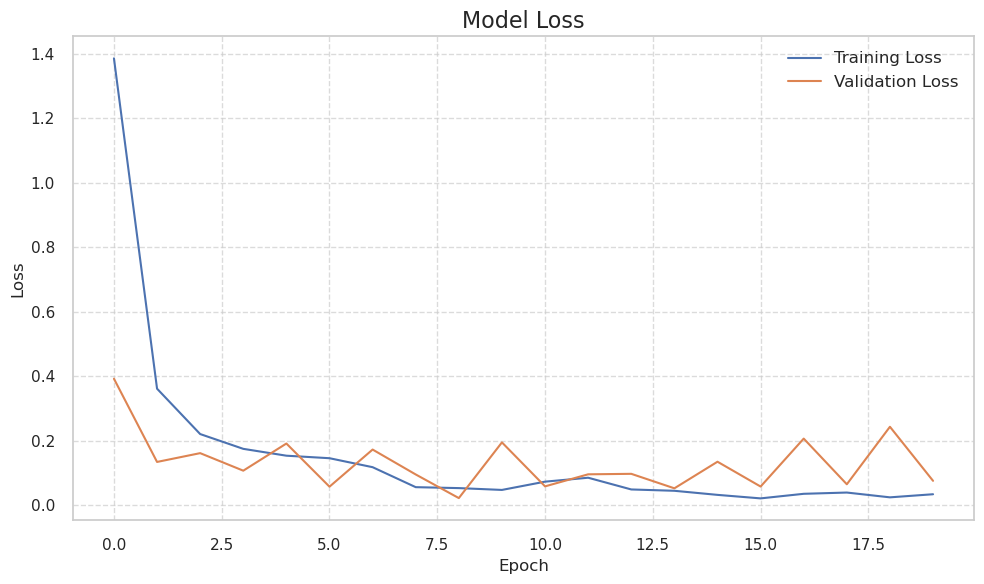

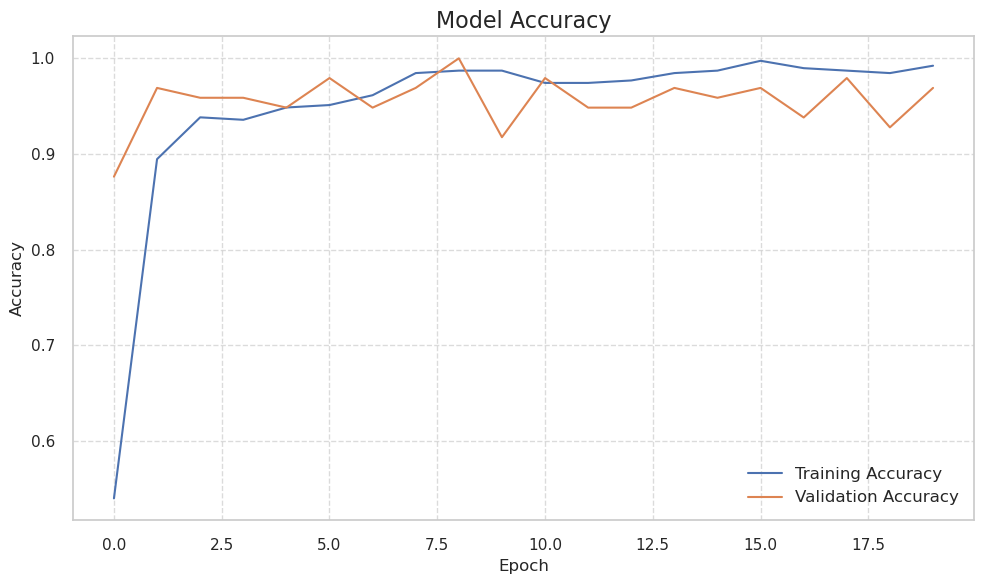

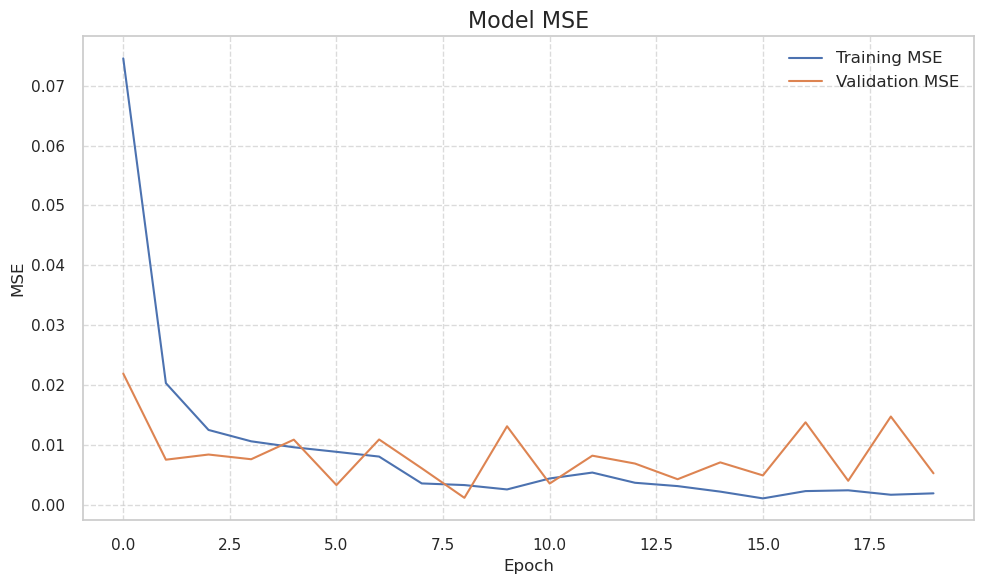

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style='whitegrid')

# Plot model loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot model accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot model MSE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model MSE', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Training and Validation Metrics Visualization

In [45]:
img_pred=model.predict(test_images)
img_pred=np.argmax(img_pred, axis=1)

2/2 [==============================] - 2s 790ms/step


In [46]:
final=train_images.class_indices
final

{'beagle': 0,
 'bulldog': 1,
 'dalmatian': 2,
 'german-shepherd': 3,
 'husky': 4,
 'labrador-retriever': 5,
 'poodle': 6,
 'rottweiler': 7}

In [47]:
labels = dict((v,k) for k,v in final.items())
y_pred = [labels[k] for k in img_pred]

In [48]:
test.reset_index(drop=True, inplace=True)

###  accuracy evaluation

In [49]:
from sklearn.metrics import accuracy_score, classification_report

In [50]:
y_test=test["BREED"].values

In [51]:
accuracy_score(y_pred, y_test)

0.9636363636363636

In [52]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            beagle       0.80      1.00      0.89         8
           bulldog       1.00      1.00      1.00         6
         dalmatian       1.00      1.00      1.00         6
   german-shepherd       1.00      0.83      0.91         6
             husky       1.00      1.00      1.00         6
labrador-retriever       1.00      0.80      0.89         5
            poodle       1.00      1.00      1.00        10
        rottweiler       1.00      1.00      1.00         8

          accuracy                           0.96        55
         macro avg       0.97      0.95      0.96        55
      weighted avg       0.97      0.96      0.96        55



### Visualizing Predicted Labels

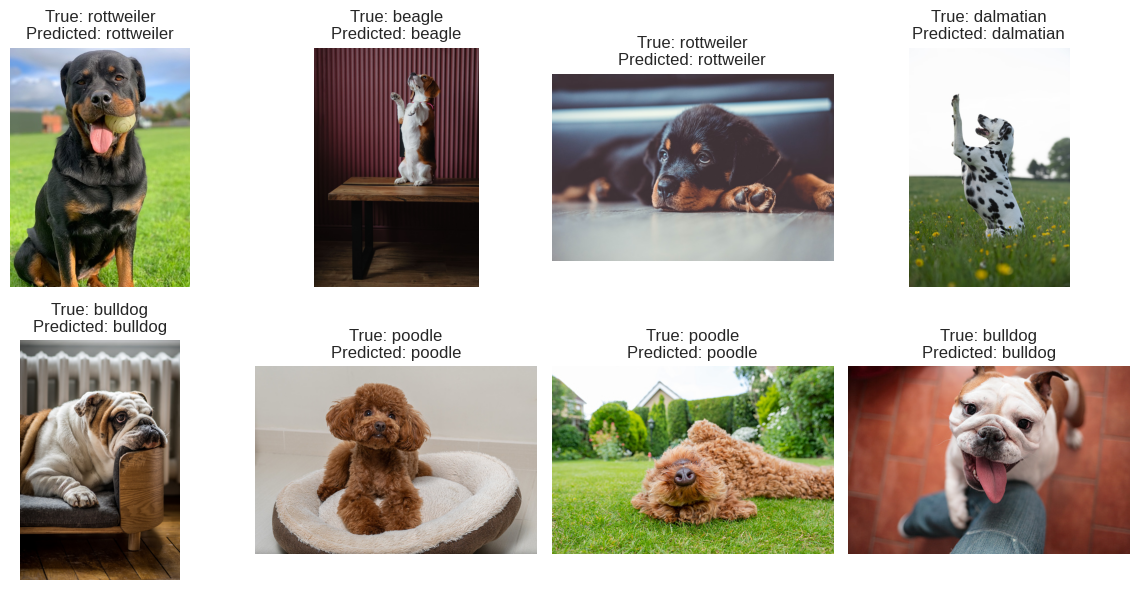

In [53]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Assuming you have a DataFrame called 'test' containing image paths and labels

num_images = 8
rows = 2
cols = num_images // rows

# Generate random indices to select unique images
indices = random.sample(range(test.shape[0]), num_images)

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i in range(num_images):
    row = i // cols
    col = i % cols
    index = indices[i]
    img_path = test.loc[index, "Image"]
    true_label = test.loc[index, "BREED"]
    predicted_label = y_pred[index]
    
    img = Image.open(img_path)
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()


###  confusion matrix

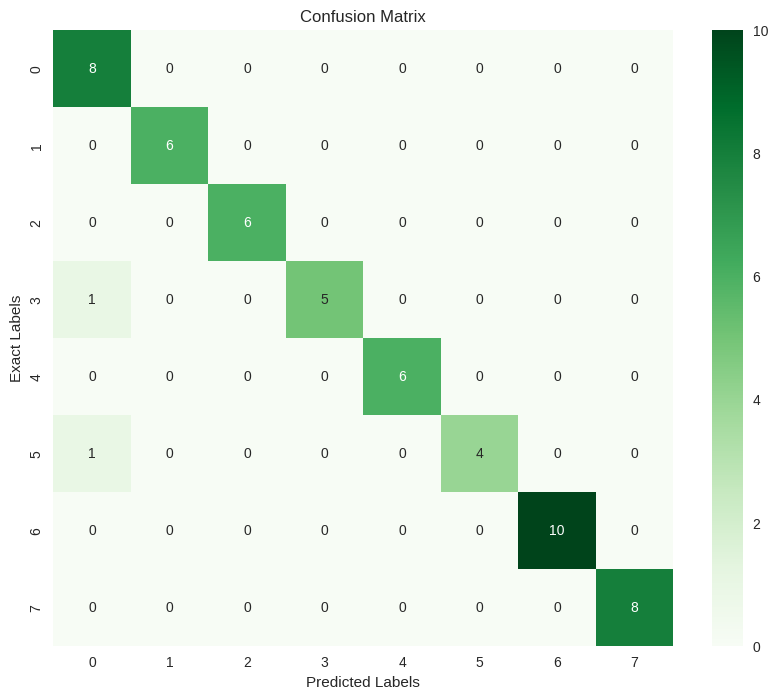

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.show()

Saving the model

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the filepath for saving the best model
filepath = 'best_model.h5'

# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Add the checkpoint callback to the list of callbacks during model training
callbacks = [checkpoint]

# Train the model with the callbacks
history = model.fit(train_images, validation_data=val_images, epochs=20, batch_size=batch_size, callbacks=callbacks)